Rice Leaf Disease Images/Bacterialblight\BACTERAILBLIGHT3_001.jpg


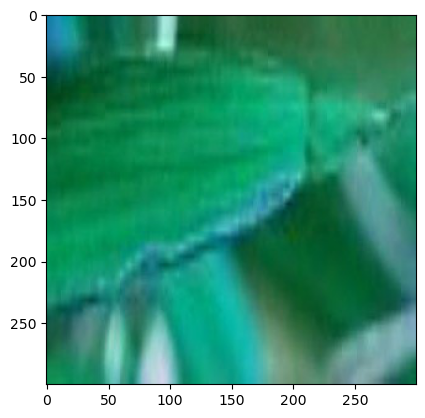

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "Rice Leaf Disease Images/"

CATEGORIES = ["Bacterialblight", "Blast","Brownspot","Tungro"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        print(os.path.join(path,img), )
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
 print(img_array)


[[[ 21 125 168]
  [ 20 125 168]
  [ 19 127 169]
  ...
  [ 41 124  72]
  [ 41 124  72]
  [ 41 124  72]]

 [[ 21 125 168]
  [ 20 125 168]
  [ 21 127 168]
  ...
  [ 41 124  72]
  [ 41 124  72]
  [ 41 124  72]]

 [[ 21 125 168]
  [ 21 125 168]
  [ 21 127 168]
  ...
  [ 41 123  71]
  [ 41 124  72]
  [ 41 124  72]]

 ...

 [[ 12 140  81]
  [ 13 141  82]
  [ 14 142  83]
  ...
  [  8 107  67]
  [  5 107  65]
  [  5 107  65]]

 [[ 11 140  81]
  [ 12 141  82]
  [ 14 142  83]
  ...
  [  9 108  68]
  [  9 109  67]
  [  6 108  66]]

 [[ 11 140  81]
  [ 12 141  82]
  [ 14 142  83]
  ...
  [ 10 109  69]
  [  9 109  67]
  [  7 109  67]]]


In [3]:
print(img_array.shape)

(300, 300, 3)


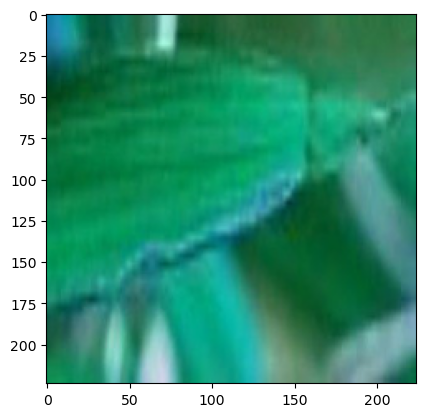

In [4]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

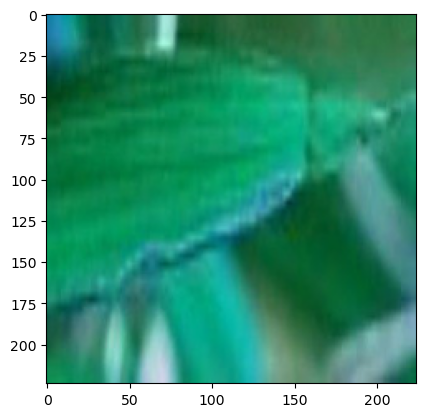

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_UNCHANGED )  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1308/1308 [00:12<00:00, 103.27it/s]

5932


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
0
2
3
1
3
1
1
1
3


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 2)

[[[[191]
   [194]
   [198]
   ...
   [198]
   [189]
   [194]]

  [[195]
   [190]
   [195]
   ...
   [193]
   [195]
   [192]]

  [[196]
   [197]
   [193]
   ...
   [199]
   [203]
   [204]]

  ...

  [[ 87]
   [ 57]
   [ 15]
   ...
   [177]
   [189]
   [193]]

  [[149]
   [161]
   [167]
   ...
   [110]
   [ 69]
   [109]]

  [[111]
   [ 69]
   [110]
   ...
   [ 87]
   [ 56]
   [ 14]]]


 [[[ 87]
   [ 57]
   [ 13]
   ...
   [175]
   [185]
   [189]]

  [[148]
   [160]
   [166]
   ...
   [107]
   [ 65]
   [106]]

  [[109]
   [ 66]
   [107]
   ...
   [ 87]
   [ 57]
   [ 15]]

  ...

  [[ 80]
   [ 38]
   [ 72]
   ...
   [159]
   [164]
   [151]]

  [[160]
   [165]
   [150]
   ...
   [167]
   [172]
   [177]]

  [[142]
   [151]
   [155]
   ...
   [ 77]
   [ 40]
   [ 73]]]


 [[[ 83]
   [ 45]
   [ 81]
   ...
   [161]
   [166]
   [154]]

  [[163]
   [167]
   [151]
   ...
   [168]
   [172]
   [177]]

  [[137]
   [145]
   [152]
   ...
   [ 63]
   [ 37]
   [ 67]]

  ...

  [[103]
   [133]
   [174]
   

In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

In [13]:
print(len(training_data))

5932


In [14]:

print("hello")


hello


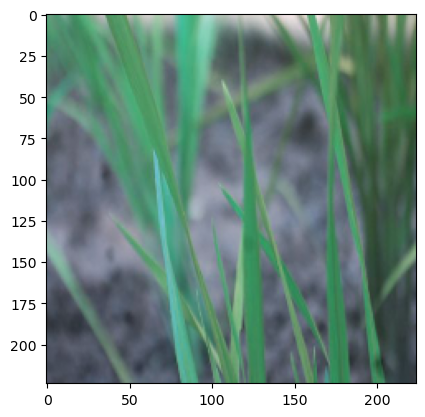

In [15]:
for i in range(10):
  plt.imshow(training_data[i][0])

In [16]:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # Read in color (3 channels)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize to (224, 224)
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing image {os.path.join(path, img)}: {e}")


In [17]:
import pickle

# Load features (X)
with open("X.pickle", "rb") as file:
    X = pickle.load(file)

# Load labels (y)
with open("y.pickle", "rb") as file:
    y = pickle.load(file)


In [18]:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)  # Read in color (3 channels)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resize to (224, 224)
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing image {os.path.join(path, img)}: {e}")


In [19]:
for i, img in enumerate(X):
    if not isinstance(img, np.ndarray):
        print(f"Non-array element at index {i}")
    elif img.shape != (224, 224, 3):  # Check for mismatched shapes
        print(f"Issue with image at index {i}: shape {img.shape}")


Issue with image at index 80: shape (224, 224, 4)
Issue with image at index 118: shape (224, 224, 4)
Issue with image at index 139: shape (224, 224, 4)
Issue with image at index 146: shape (224, 224, 4)
Issue with image at index 176: shape (224, 224, 4)
Issue with image at index 188: shape (224, 224, 4)
Issue with image at index 300: shape (224, 224, 4)
Issue with image at index 331: shape (224, 224, 4)
Issue with image at index 362: shape (224, 224, 4)
Issue with image at index 382: shape (224, 224, 4)
Issue with image at index 393: shape (224, 224, 4)
Issue with image at index 417: shape (224, 224, 4)
Issue with image at index 450: shape (224, 224, 4)
Issue with image at index 475: shape (224, 224, 4)
Issue with image at index 500: shape (224, 224, 4)
Issue with image at index 515: shape (224, 224, 4)
Issue with image at index 528: shape (224, 224, 4)
Issue with image at index 544: shape (224, 224, 4)
Issue with image at index 578: shape (224, 224, 4)
Issue with image at index 598: s

In [20]:
import cv2
import numpy as np

X_fixed = []
for i, img in enumerate(X):
    if img.shape == (224, 224, 4):  # RGBA image
        img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)  # Convert to RGB
        X_fixed.append(img)
    elif img.shape == (224, 224, 3):  # Valid RGB image
        X_fixed.append(img)
    else:
        print(f"Skipping image at index {i}, shape: {img.shape}")  # Log any other inconsistencies

X = X_fixed


In [21]:
X = np.array(X) / 255.0  # Normalize pixel values
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
num_classes = len(set(y))  # Number of categories
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


Shape of X: (5932, 224, 224, 3)
Shape of y: (5932,)


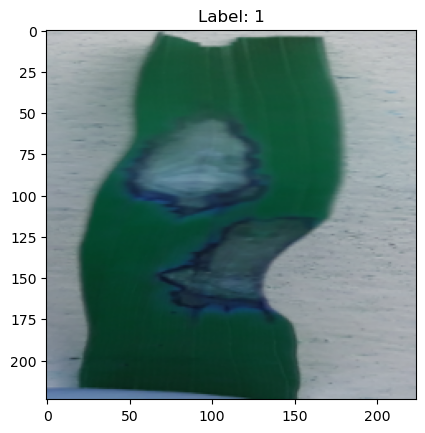

In [24]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Display an example image
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.title(f"Label: {y[0]}")
plt.show()


In [31]:
import pickle

# Replace 'model_file.pkl' with the path to your pickle file
with open('X.pickle', 'rb') as file:
    model = pickle.load(file)


In [32]:
from PIL import Image
import numpy as np

# Load and preprocess the image
image = Image.open('IMG_20190419_095031.jpg').resize((224, 224))  # Resize if needed
image_array = np.array(image) / 255.0  # Normalize pixel values if required
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


In [33]:
predictions = model.predict(image_array)
print("Predictions:", predictions)


AttributeError: 'list' object has no attribute 'predict'